In [1]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df.unstack(level=0).stack(level=0).sort_index(level=0, ascending=False)

avg_package     students    
                    cse ece      cse ece
2022 mumbai           0   0        0   0
     delhi            7  15        8  16
2021 mumbai           0   0        0   0
     delhi            5  13        6  14
2020 mumbai           0   0        0   0
     delhi            3  11        4  12
2019 mumbai           0   0        0   0
     delhi            1   9        2  10

In [3]:
# code here

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [4]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [5]:
con = confirm.melt(id_vars=['Province/State',	'Country/Region',	'Lat',	'Long'], var_name='Date', value_name='confirm')

In [6]:
dea = deaths.melt(id_vars=['Province/State',	'Country/Region',	'Lat',	'Long'], var_name='Date', value_name='Death')

In [9]:
deaths.shape[0] *deaths.shape[1]

312409

In [7]:
tmp=pd.merge(con,dea, on=['Province/State',	'Country/Region',	'Lat',	'Long','Date']).set_index([	'Country/Region','Province/State'])
tmp

,,Lat,Long,Date,confirm,Death
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.939110,67.709953,1/22/20,0,0
Albania,NaN,41.153300,20.168300,1/22/20,0,0
Algeria,NaN,28.033900,1.659600,1/22/20,0,0
Andorra,NaN,42.506300,1.521800,1/22/20,0,0
Angola,NaN,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,1/2/23,703228,5708
Winter Olympics 2022,NaN,39.904200,116.407400,1/2/23,535,0
Yemen,NaN,15.552727,48.516388,1/2/23,11945,2159


###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [23]:
# code here
tmp=tmp.groupby('Country/Region').agg(
   { 'confirm':'sum',
    'Death':'sum'}).reset_index()

tmp['avg']=tmp['Death']/tmp['confirm']
tmp.sort_values(by='avg',ascending=False)

,Country/Region,confirm,Death,avg
93,"Korea, North",234,1404,6.000000
107,MS Zaandam,9071,2014,0.222026
198,Yemen,7091065,1372952,0.193617
169,Sudan,38729339,2850576,0.073602
141,Peru,2203724423,156296296,0.070924
...,...,...,...,...
76,Holy See,24893,0,0.000000
170,Summer Olympics 2020,441598,0,0.000000
197,Winter Olympics 2022,179152,0,0.000000
185,Tuvalu,137771,0,0.000000


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

226

In [40]:
# code here
tmp = pd.merge(con,dea, on=['Province/State',	'Country/Region',	'Lat',	'Long','Date']).reset_index()
tmp = tmp[tmp['Country/Region']=='India']
tmp['No of new case'] = tmp['confirm']-tmp['confirm'].shift(1)

### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [73]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df=df.set_index(['Country'	,'City/Town'])
# pd.MultiIndex)

In [48]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [68]:
df=df.loc['India',:]

In [71]:
df[df['PM10'].values==df['PM10'].max()]

,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,
Kanpur,1,2016,173,>75%,319,NaN,2018


In [72]:
df[df['PM10'].values==df['PM10'].min()]

,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,
Aizawl,484,2016,27,NaN,44,NaN,2018


In [84]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df=df.set_index(['Country'	,'City/Town'])
# pd.MultiIndex)

<Axes: ylabel='PM10'>

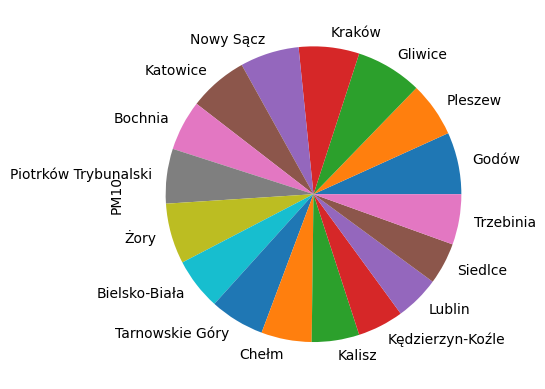

In [75]:
df.loc['Poland']['PM10'].plot(kind="pie")

In [ ]:
Convert this MultiIndex DataFrame to Series by retaining the informations.

<Axes: xlabel='Country,City/Town'>

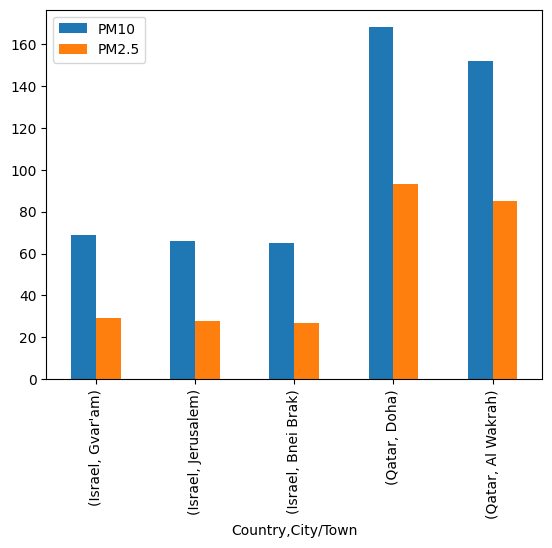

In [79]:
df.loc[['Israel','Qatar']][['PM10','PM2.5']].plot(kind="bar")

In [89]:
df.stack()

Country  City/Town                         
India    Kanpur     Unnamed: 0                    0
                    Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 3138, dtype: object